In [2]:
import cv2
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd

from pathbook.pathbook import *

ModuleNotFoundError: No module named 'pathbook'

In [3]:
# pth_root = r"C:\workspace\hakaton\dataset"
pth_root = path_initial_train_dataset

leb_types = ['klikun', 'maliy', 'shipun']

name2id = {
    'klikun': 0,
    'maliy': 1,
    'shipun': 2
}

id2name = {v: k for k, v in name2id.items()}

print(os.listdir(pth_root))

['.DS_Store', 'shipun', 'klikun', 'maliy']


In [103]:

def find_box_by_mask(image, color):
    """
    Находит координаты бокса объекта на основе маски по цвету
    Возвращает координаты бокса [x, y, x2, y2] или None, если объект не найден
    """
    mask = image == color
    # Находим индексы True значений в маске
    nonzero_indices = np.transpose(np.nonzero(mask))

    # Если нет True значений, объект не найден
    if len(nonzero_indices) == 0:
        return None

    # Находим границы бокса
    min_x = np.min(nonzero_indices[:, 1])
    max_x = np.max(nonzero_indices[:, 1])
    min_y = np.min(nonzero_indices[:, 0])
    max_y = np.max(nonzero_indices[:, 0])

    # Вычисляем координаты бокса
    box = [min_x, min_y, max_x, max_y]

    return box

In [104]:
result_list  = []

uniq_id_frame = 0
for type_name in leb_types:

    pth_masks = os.path.join(pth_root, type_name, 'masks')
    file_list = os.listdir(pth_masks)
    for file_mask in tqdm(file_list):
        base_name = file_mask.rsplit('.', 1)[0]
        pth_img = os.path.join(pth_masks, file_mask)
        img = cv2.imread(pth_img)
        objs = np.unique(img)
        objs.sort()
        objs = objs[1:] # фон не учитываем
        for id_obj, obj_color in enumerate(objs):
            bb = find_box_by_mask(image=img, color=obj_color)
            pth_mask_img = os.path.join(type_name, 'masks', file_mask)
            pth_img = os.path.join(type_name, 'images', base_name + ".jpg")
            h, w, _ = img.shape
            result_list.append((uniq_id_frame, type_name, name2id[type_name], id_obj, pth_img, pth_mask_img, *bb, h, w))
        uniq_id_frame += 1


100%|██████████| 3011/3011 [08:56<00:00,  5.61it/s]


In [6]:
columns = ['frame_id', 'type_name', 'type_id', 'obj_id', 'path_img', 'path_mask', 'x1', 'y1', 'x2', 'y2', 'height', 'width']
df = pd.DataFrame(result_list, columns=columns)
df.to_csv('all_annotation.csv', index=False)

NameError: name 'result_list' is not defined

In [10]:
import pandas as pd
df = pd.read_csv('all_annotation.csv')

In [15]:
frame_id_list = list(df['frame_id'].unique())

In [17]:
import random

random.shuffle(frame_id_list)

In [19]:
id_stlit = int(0.9 * len(frame_id_list))

fr_train = frame_id_list[:id_stlit]
fr_test = frame_id_list[id_stlit:]


In [20]:
train_df = df[df.frame_id.isin(fr_train)]
test_df = df[df.frame_id.isin(fr_test)]

In [21]:
len(fr_train), len(fr_test)

(8131, 904)

In [22]:
train_df.__len__(), test_df.__len__()

(12705, 1392)

In [23]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)
len(train_df), len(test_df)

(12705, 1392)

In [25]:
train_df[train_df.obj_id == 0].groupby(by='type_name').count()

,frame_id,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
type_name,,,,,,,,,,,
klikun,2720,2720,2720,2720,2720,2720,2720,2720,2720,2720,2720
maliy,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696,2696
shipun,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715


In [100]:
df.groupby(by='type_name').count()

,frame_id,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
type_name,,,,,,,,,,,
klikun,4371,4371,4371,4371,4371,4371,4371,4371,4371,4371,4371
maliy,6027,6027,6027,6027,6027,6027,6027,6027,6027,6027,6027
shipun,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699,3699


In [90]:
imgpth_list = list(df.path_img.unique())
pth2frame_id = {v: i for i, v in enumerate(imgpth_list)}
df['frame_id'] = df['path_img'].apply(lambda x: pth2frame_id[x])
df.to_csv("all_annotation.csv", index=False)

In [92]:
len(pth2frame_id)

8839

In [ ]:
imgpth_list = list(train_df.path_img.unique())
pth2frame_id = {v: i+8839 for i, v in enumerate(imgpth_list)}
train_df['frame_id'] = train_df['path_img'].apply(lambda x: pth2frame_id[x])
train_df.to_csv("train.csv", index=False)

In [95]:
test_df.head(100)

,frame_id,type_name,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
2014,2014,klikun,0,0,images\2838665848.jpg,masks\2838665848.png,139,89,479,459,599,800
457,457,klikun,0,0,images\1485516500.jpg,masks\1485516500.png,3,3,392,489,500,408
478,478,klikun,0,0,images\1486047569.jpg,masks\1486047569.png,85,132,340,378,423,450
438,438,klikun,0,0,images\1483387320.jpg,masks\1483387320.png,95,118,441,322,402,500
3726,3726,klikun,0,0,images\4011766400.jpg,masks\4011766400.png,0,147,1435,1330,1365,2048
...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1898,klikun,0,0,images\2627311384.jpg,masks\2627311384.png,328,492,1000,974,1080,1080
4352,4352,klikun,0,0,images\original (71).jpg,masks\original (71).png,1604,594,1949,891,1536,2048
1988,1988,klikun,0,0,images\2836750958.jpg,masks\2836750958.png,145,134,517,452,533,800
2994,2994,klikun,0,0,images\3720020794.jpg,masks\3720020794.png,383,232,988,615,750,1000


In [98]:
test_df.head(100)

,frame_id,type_name,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
2014,1496,klikun,0,0,images\2838665848.jpg,masks\2838665848.png,139,89,479,459,599,800
457,353,klikun,0,0,images\1485516500.jpg,masks\1485516500.png,3,3,392,489,500,408
478,372,klikun,0,0,images\1486047569.jpg,masks\1486047569.png,85,132,340,378,423,450
438,334,klikun,0,0,images\1483387320.jpg,masks\1483387320.png,95,118,441,322,402,500
3726,2744,klikun,0,0,images\4011766400.jpg,masks\4011766400.png,0,147,1435,1330,1365,2048
...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1401,klikun,0,0,images\2627311384.jpg,masks\2627311384.png,328,492,1000,974,1080,1080
4352,3012,klikun,0,0,images\original (71).jpg,masks\original (71).png,1604,594,1949,891,1536,2048
1988,1474,klikun,0,0,images\2836750958.jpg,masks\2836750958.png,145,134,517,452,533,800
2994,2185,klikun,0,0,images\3720020794.jpg,masks\3720020794.png,383,232,988,615,750,1000


In [174]:
df.groupby(by='frame_id').count()

,type_name,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
frame_id,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9
1,1,1,1,1,1,1,1,1,1,1,1
2,3,3,3,3,3,3,3,3,3,3,3
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9033,1,1,1,1,1,1,1,1,1,1,1
9034,1,1,1,1,1,1,1,1,1,1,1
9035,1,1,1,1,1,1,1,1,1,1,1


In [176]:

root = path_initial_train_dataset

In [182]:

mask = df.frame_id == 8803

img_pth = df[mask]['path_img'].iloc[0]
print(img_pth)
# df[mask]
img = cv2.imread(os.path.join(root, img_pth))
img.shape

klikun\images\1.jpg


(1365, 2048, 3)

In [179]:
df[mask]


,frame_id,type_name,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
0,8803,klikun,0,0,klikun\images\1.jpg,klikun\masks\1.png,0,348,985,1364,1365,2048
1,8803,klikun,0,1,klikun\images\1.jpg,klikun\masks\1.png,0,889,94,989,1365,2048
2,8803,klikun,0,2,klikun\images\1.jpg,klikun\masks\1.png,63,666,205,1099,1365,2048
3,8803,klikun,0,3,klikun\images\1.jpg,klikun\masks\1.png,971,730,1426,1269,1365,2048
4,8803,klikun,0,4,klikun\images\1.jpg,klikun\masks\1.png,1474,474,2047,1364,1365,2048
...,...,...,...,...,...,...,...,...,...,...,...,...
14092,8803,shipun,2,0,shipun\images\img_995.jpg,shipun\masks\img_995.png,853,540,1660,1068,1536,2048
14093,8803,shipun,2,0,shipun\images\img_996.jpg,shipun\masks\img_996.png,283,235,1444,1385,1632,2048
14094,8803,shipun,2,0,shipun\images\img_997.jpg,shipun\masks\img_997.png,566,282,1755,1101,1515,2048
14095,8803,shipun,2,0,shipun\images\img_998.jpg,shipun\masks\img_998.png,255,142,972,792,853,1280


In [180]:
img_pth

'klikun\\images\\1.jpg'

In [171]:
root = path_initial_train_dataset
img = cv2.imread(os.path.join(root, img_pth))
img.shape

(2048, 1536, 3)

In [172]:
bb = df[mask][['x1', 'y1', 'x2', 'y2']].to_numpy()
for x1, y1, x2, y2 in bb:
    cv2.rectangle(img, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=1)

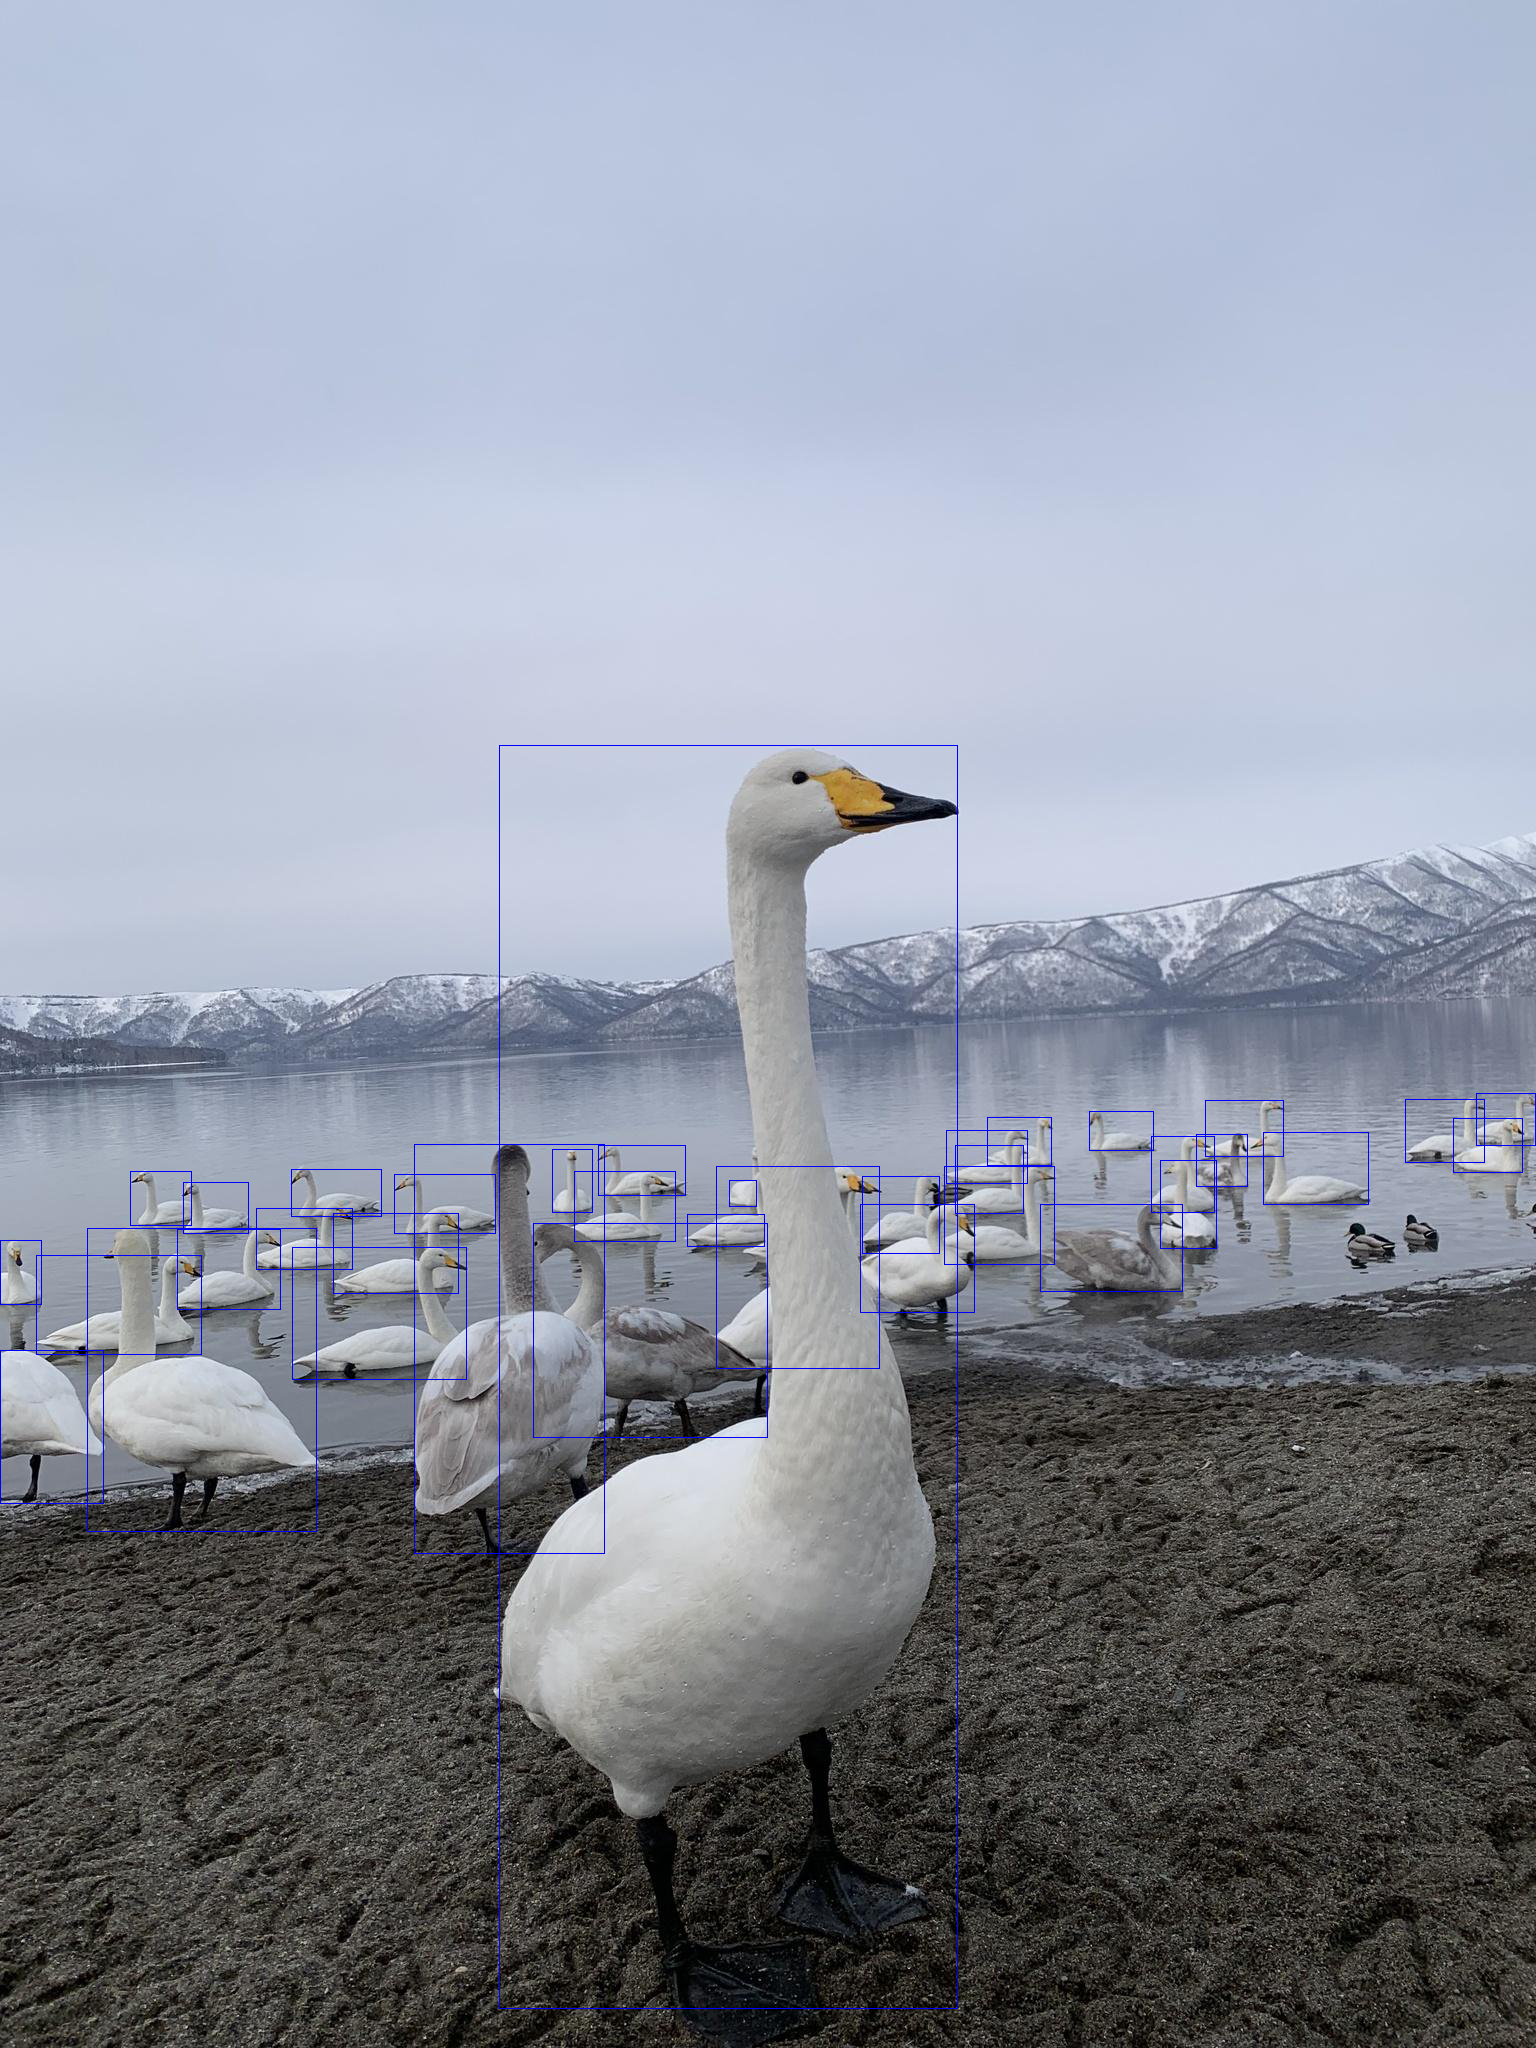

In [173]:
Image.fromarray(img[:,:,::-1])

In [128]:
img

In [28]:
df = pd.read_csv('all_annotation.csv')
df.describe()


,frame_id,type_id,obj_id,x1,y1,x2,y2,height,width
count,14097.00000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000
mean,4403.53898,0.952330,0.997872,329.024544,248.824502,820.381358,649.006952,875.860325,1144.048734
std,2411.07502,0.755136,2.897584,280.830550,192.109234,458.120914,358.998714,428.773225,515.396168
min,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,52.000000,95.000000,104.000000
25%,2592.00000,0.000000,0.000000,127.000000,124.000000,488.000000,396.000000,567.000000,800.000000
50%,4305.00000,1.000000,0.000000,264.000000,206.000000,695.000000,517.000000,685.000000,1000.000000
75%,6173.00000,2.000000,1.000000,458.000000,315.000000,1051.000000,839.000000,1165.000000,1600.000000
max,9037.00000,2.000000,51.000000,2124.000000,1807.000000,5146.000000,3999.000000,4000.000000,6000.000000
